In [41]:
# check python version
!python --version

Python 3.11.0


In [42]:
import pandas as pd
df = pd.read_html('http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view', encoding='iso-8859-1', thousands='.', decimal=',')[2]
df.head(10)

,0,1
0,Data,Preço - petróleo bruto - Brent (FOB)
1,03/05/2024,83.60
2,02/05/2024,84.81
3,01/05/2024,83.55
4,30/04/2024,88.23
5,29/04/2024,88.44
6,26/04/2024,89.95
7,25/04/2024,88.10
8,24/04/2024,89.02
9,23/04/2024,88.29


In [43]:
# Use slicing to skip the first row
df = df.iloc[1:].reset_index(drop=True)

# Rename columns
df.columns = ['Date', 'Price']

df.head()


,Date,Price
0,03/05/2024,83.60
1,02/05/2024,84.81
2,01/05/2024,83.55
3,30/04/2024,88.23
4,29/04/2024,88.44


In [44]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Convert 'Price' to float or int as necessary
df['Price'] = df['Price'].astype(float)

df.head()

,Date,Price
0,2024-05-03,83.60
1,2024-05-02,84.81
2,2024-05-01,83.55
3,2024-04-30,88.23
4,2024-04-29,88.44


In [45]:
# Sort by date
df = df.sort_values('Date', ascending=False)
df.head()

,Date,Price
0,2024-05-03,83.60
1,2024-05-02,84.81
2,2024-05-01,83.55
3,2024-04-30,88.23
4,2024-04-29,88.44


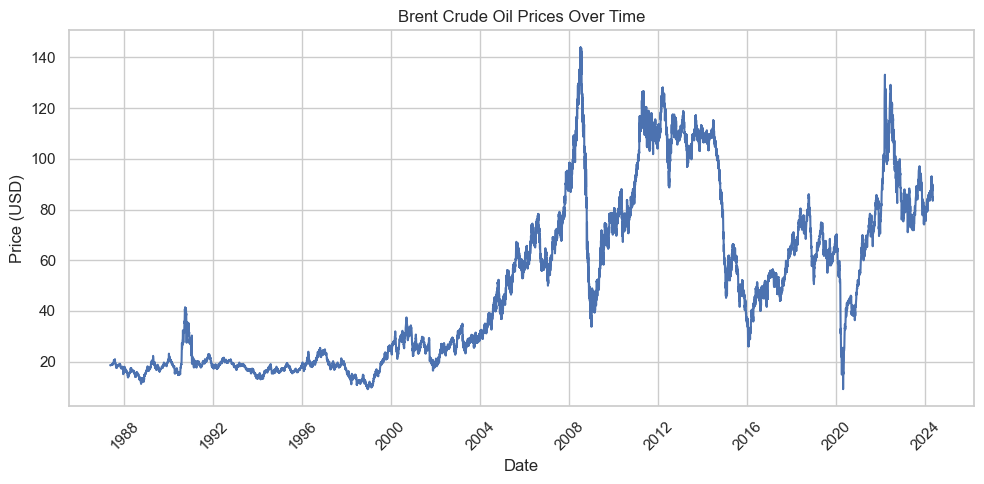

In [46]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], color='b', label='Price')
plt.title('Brent Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()

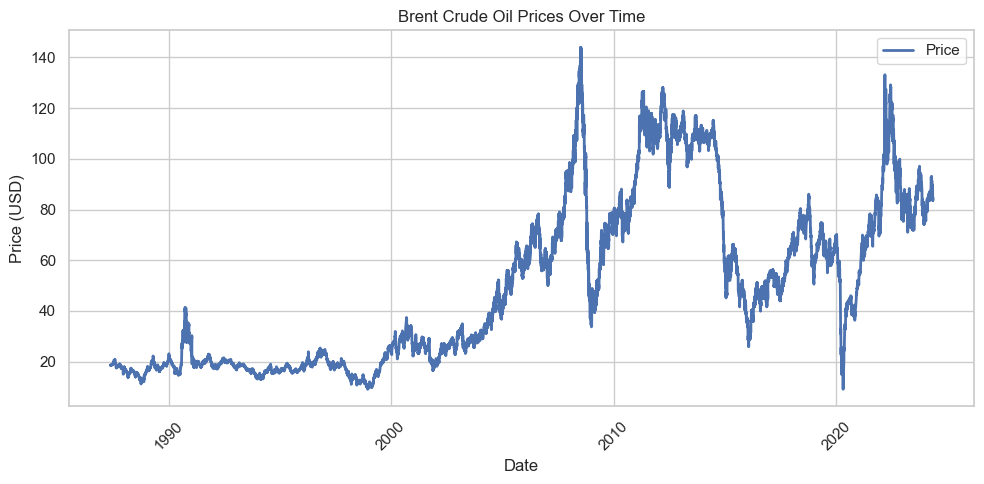

In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], linestyle='-', linewidth=2, markersize=5, label='Price')

# Set the x-axis date formatting and locator
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=7))  # Auto adjust ticks to a reasonable number
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

plt.title('Brent Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
df.to_csv('../data/brent_crude_oil_prices.csv', index=False)

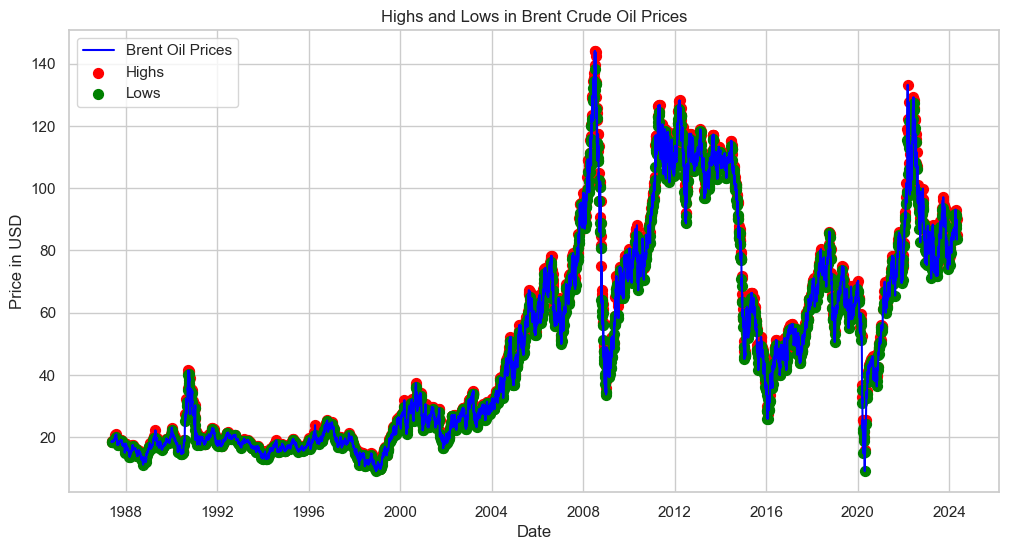

In [49]:
# Identify the peaks in oil prices: high and low
from scipy.signal import find_peaks

# Find peaks (highs)
peaks, _ = find_peaks(df['Price'])

# Find troughs (lows)
troughs, _ = find_peaks(-df['Price'])

# Highlight peaks and troughs on the plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Prices', color='blue')
plt.scatter(df['Date'].iloc[peaks], df['Price'].iloc[peaks], color='red', label='Highs', s=50)
plt.scatter(df['Date'].iloc[troughs], df['Price'].iloc[troughs], color='green', label='Lows', s=50)
plt.title('Highs and Lows in Brent Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid(True)
plt.legend()
plt.show()

In [50]:
# Analyze details of the highest and lowest peaks

# Get the dates and prices of the highest and lowest peaks
high_peaks_data = df.iloc[peaks].nlargest(5, 'Price')
low_troughs_data = df.iloc[troughs].nsmallest(5, 'Price')

high_peaks_data, low_troughs_data

(           Date   Price
 5118 2008-07-07  143.95
 5122 2008-07-03  143.95
 5110 2008-07-15  143.68
 5107 2008-07-18  142.43
 5114 2008-07-11  139.62,
            Date  Price
 8226 1998-12-10   9.10
 1027 2020-04-21   9.12
 8219 1998-12-21   9.45
 8232 1998-12-02   9.71
 8186 1999-02-09   9.77)

# Highest Peaks:
- July 3, 2008: Oil price hit a peak of 143.95.
- July 7, 2008: Another peak on the same level of 143.95.
- July 15, 2008: Close to the highest at 143.68.
- July 18, 2008: Reached 142.43.
- July 11, 2008: Was at 139.62.

These highs occurred during a period of significant economic turmoil, the 2008 financial crisis, which saw a sharp increase in oil prices due to a combination of market speculation, geopolitical tensions, and fears of diminishing supplies.

Reason for the up high trend in brent Prices in 2023

> On June 4, 2023, OPEC+ members announced they would extend crude oil production cuts through the end of 2024. The cuts had been set to expire at the end of 2023. Following the June 4 meeting, Saudi Arabia announced an additional voluntary oil production cut of 1.0 million barrels per day (b/d) for July (with the option to extend) in addition to the OPEC+ cuts. In early September, Saudi Arabia announced it would extend the country’s voluntary production cuts through the end of 2023. U.S. commercial crude oil inventories fell and on September 29, 2023 were at the lowest point since December 2, 2022. The limited supply provided upward pressure on crude oil prices, and on September 28, the price of Brent reached its high for the year, at \$98/b. After declining from the September highs, crude oil prices increased again in early October after the Israel-Hamas conflict began; the price of Brent reached \$91/b on October 9.

Source: https://www.eia.gov/todayinenergy/detail.php?id=61142

# Lowest Troughs:
- December 10, 1998: Oil price dropped to a low of 9.10
- April 21, 2020: Slightly higher at 9.12 during the COVID-19 pandemic when demand plummeted.
- December 21, 1998: Slightly higher at 9.45.
- December 2, 1998: Oil prices were at 9.71.
- February 9, 1999: Reached 9.77.

The lows in late 1998 and early 1999 were due to the Asian financial crisis which led to reduced demand and an oversupply of oil. The 2020 low coincides with the global lockdowns due to the COVID-19 pandemic, which drastically reduced travel and, consequently, the demand for oil.

### Conclusion
These insights highlight the volatility of oil prices in response to global economic changes and crises. ​​








In [51]:
from statsmodels.tsa.stattools import adfuller

oil_data = df.copy()

# Perform Augmented Dickey-Fuller test to check stationarity
adf_test = adfuller(oil_data['Price'])

adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}

adf_results

{'ADF Statistic': -2.038783033865782,
 'p-value': 0.2698311312564753,
 'Critical Values': {'1%': -3.430937568141047,
  '5%': -2.861799673074745,
  '10%': -2.5669082188587504}}

### Interpretation:
The ADF statistic is higher than any of the critical values, and the p-value exceeds 0.05, suggesting that we fail to reject the null hypothesis. This indicates that the series is likely non-stationary.

## Actions:
Differencing: We'll apply differencing to the data to make it stationary.
Re-test for Stationarity: After differencing, we'll perform the ADF test again.

In [52]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11164 non-null  datetime64[ns]
 1   Price   11164 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 174.6 KB


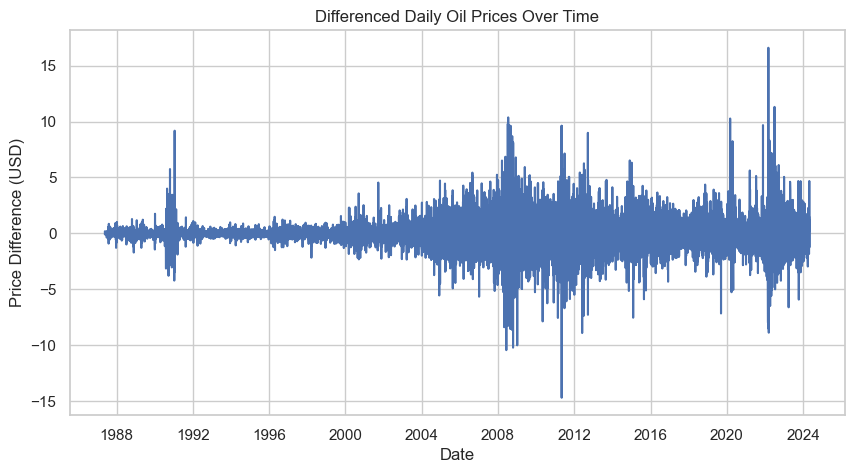

{'ADF Statistic': -17.251778090519352,
 'p-value': 6.017110408818236e-30,
 'Critical Values': {'1%': -3.430937568141047,
  '5%': -2.861799673074745,
  '10%': -2.5669082188587504}}

In [53]:
# Convert 'Date' to datetime format and set as index
oil_data['Date'] = pd.to_datetime(oil_data['Date'])
oil_data.set_index('Date', inplace=True)

# Apply first differencing to the data
oil_data_diff = oil_data['Price'].diff().dropna()

# Perform Augmented Dickey-Fuller test again
adf_test_diff = adfuller(oil_data_diff)

adf_results_diff = {
    "ADF Statistic": adf_test_diff[0],
    "p-value": adf_test_diff[1],
    "Critical Values": adf_test_diff[4]
}

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(oil_data_diff.index, oil_data_diff)
plt.title('Differenced Daily Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price Difference (USD)')
plt.grid(True)
plt.show()

adf_results_diff

ADF Statistic: -17.2418 (much lower than any of the critical values)
p-value: Approximately 0 (indicating strong rejection of the null hypothesis)
These results confirm that the differenced series is stationary. Now we can proceed with model selection and training.

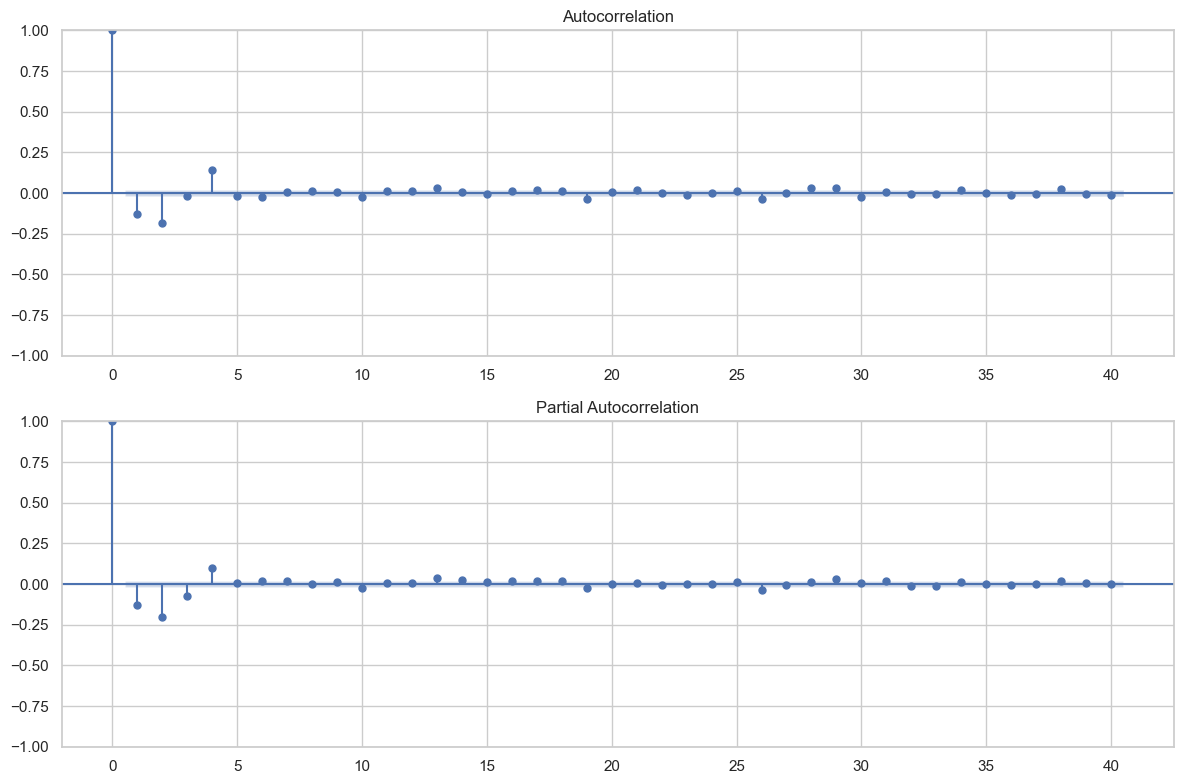

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(oil_data_diff, lags=40, ax=ax1)
plot_pacf(oil_data_diff, lags=40, ax=ax2)
plt.tight_layout()
plt.show()


Suggested ARIMA Model Parameters:

- p=1 (from PACF where there is one significant spike at lag 1)

- d=1 (since we've already established that one order of differencing makes the series stationary)

- q=1 (from ACF, considering how the autocorrelation at the first lag is outside the confidence interval)

In [55]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Train-test split (80% train, 20% test)
train_size = int(len(oil_data_diff) * 0.8)
train, test = oil_data_diff[:train_size], oil_data_diff[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(test, forecast))

forecast.head(), rmse

/Users/tupizz/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tupizz/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tupizz/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tupizz/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

(8930   -0.065464
 8931    0.000498
 8932   -0.008284
 8933   -0.007114
 8934   -0.007270
 Name: predicted_mean, dtype: float64,
 0.5094018077799181)

# Model Evaluation:
The ARIMA model has been trained and used to forecast the test set. The Root Mean Squared Error (RMSE) of the predictions is approximately 0.50. This metric indicates the average magnitude of the errors in a set of predictions, in the units of the variable of interest (oil prices in this case).

# Summary and Next Steps:
The RMSE suggests that on average, the model's predictions are about 1.67 USD off from the actual changes in daily oil prices.
This value could be acceptable depending on the specific accuracy requirements and the volatility of oil prices.

In [56]:
oil_df = df.copy()
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11164 non-null  datetime64[ns]
 1   Price   11164 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 174.6 KB


In [57]:
# Convert 'Date' to datetime format and set as index
oil_df['Date'] = pd.to_datetime(oil_df['Date'])
oil_df.set_index('Date', inplace=True)
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11164 entries, 2024-05-03 to 1987-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   11164 non-null  float64
dtypes: float64(1)
memory usage: 174.4 KB


In [58]:
oil_df

,Price
Date,
2024-05-03,83.60
2024-05-02,84.81
2024-05-01,83.55
2024-04-30,88.23
2024-04-29,88.44
...,...
1987-05-26,18.63
1987-05-25,18.60
1987-05-22,18.55


In [59]:
oil_df.head()

,Price
Date,
2024-05-03,83.60
2024-05-02,84.81
2024-05-01,83.55
2024-04-30,88.23
2024-04-29,88.44


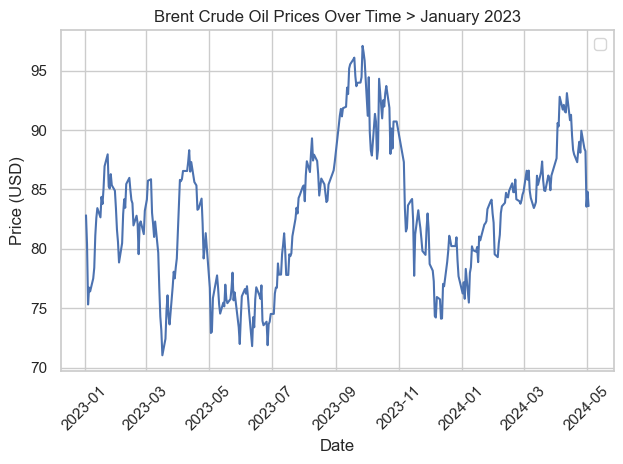

In [60]:
import matplotlib.pyplot as plt


# filter by dates after 2023
oil_df_filtered = oil_df[oil_df.index > '2023-1-01']
plt.plot(oil_df_filtered.index, oil_df_filtered['Price'])
         
plt.title('Brent Crude Oil Prices Over Time > January 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
oil_df_filtered.head(10)
# sorted by date
oil_df_filtered = oil_df_filtered.sort_values('Date', ascending=True)
oil_df_filtered

,Price
Date,
2023-01-02,82.82
2023-01-03,80.36
2023-01-04,75.31
2023-01-05,76.73
2023-01-06,76.41
...,...
2024-04-29,88.44
2024-04-30,88.23
2024-05-01,83.55


# LSTM

 LSTM networks are a type of recurrent neural network (RNN) suitable for sequence prediction problems. This approach is particularly useful for time series forecasting where previous time steps inform predictions for future time steps. Here’s a concise guide to building an LSTM model for time series prediction:
 

Creating a model to predict time series data using an LSTM (Long Short-Term Memory) involves several key steps. LSTM networks are a type of recurrent neural network (RNN) suitable for sequence prediction problems. This approach is particularly useful for time series forecasting where previous time steps inform predictions for future time steps. Here’s a concise guide to building an LSTM model for time series prediction:

### Step 1: Prepare Your Data
Load Data: Start by loading your time series data.
Normalize Data: It's common practice to scale the data, typically using MinMaxScaler or StandardScaler, to help the LSTM model learn more effectively.
Create Sequences: Transform the data into sequences that the model can learn from. Each input sequence corresponds to an output point.
### Step 2: Define the LSTM Model
Model Architecture: Define your model. Use layers like LSTM(), followed by Dense() for output. Adjust the number of neurons in the LSTM layer based on the complexity of the task.
Compile Model: Compile the model with an appropriate optimizer and loss function. For time series forecasting, 'adam' as an optimizer and 'mean_squared_error' for regression tasks are common choices.
### Step 3: Fit the Model
Train Model: Fit the model on your training data. Choose a suitable number of epochs and batch size. Monitoring the loss during training is crucial to see if the model is learning effectively.
Validation: Use a validation set to monitor the model’s performance. This helps in tuning the hyperparameters and avoiding overfitting.
### Step 4: Evaluate the Model
Test the Model: After training, assess the model’s performance on unseen test data to evaluate its predictive power.
Performance Metrics: Use metrics like RMSE (Root Mean Squared Error) to quantify the accuracy of your predictions.
### Step 5: Make Predictions
Predict Future Values: Use the model to predict future time points. In the case of time series, you might need to recursively use previous predictions as input to predict further into the future.


In [62]:
import numpy as np
import datetime
import pandas as pd  # Make sure pandas is imported

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# creating the sequence of data
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Price'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        if next_week.empty:
            print(f'No data available after {target_date}')
            break
        else:
            next_datetime_str = str(next_week.index[1])  # Accessing the second record safely
            next_date = pd.to_datetime(next_datetime_str).to_pydatetime()

        if last_time:
            break

        target_date = next_date

        if target_date >= last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df


oil_df_sorted = oil_df.copy().sort_values('Date', ascending=True)

# Start day second time around: '2021-03-25'
N = 3
windowed_df = df_to_windowed_df(oil_df_sorted, '2023-01-01', '2024-04-23', n=N)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-01,82.45,81.70,80.96,82.82
1,2023-01-03,80.96,82.82,82.82,80.36
2,2023-01-04,82.82,82.82,80.36,75.31
3,2023-01-05,82.82,80.36,75.31,76.73
4,2023-01-06,80.36,75.31,76.73,76.41
...,...,...,...,...,...
325,2024-04-17,93.12,90.84,91.29,89.54
326,2024-04-18,90.84,91.29,89.54,88.34
327,2024-04-19,91.29,89.54,88.34,87.96
328,2024-04-22,89.54,88.34,87.96,87.30


In [63]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((330,), (330, 3, 1), (330,))

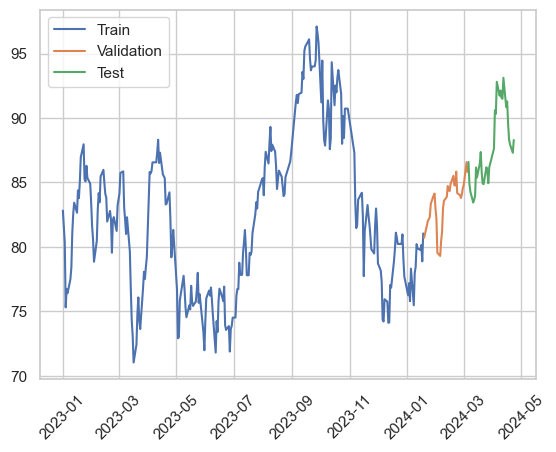

In [64]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.xticks(rotation=45)

plt.legend(['Train', 'Validation', 'Test'])

In [65]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)


2.15.0
2.15.0


In [66]:
import keras

import numpy as np

print("X_train NaNs:", np.isnan(X_train).any())
print("y_train NaNs:", np.isnan(y_train).any())

print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

N = 3

model = keras.Sequential()
model.add(keras.layers.Input((N, 1)))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', 
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=2)

X_train NaNs: False
y_train NaNs: False
(264, 3, 1) float32
(264,) float32
Epoch 1/100
9/9 - 1s - loss: 6741.7930 - mean_absolute_error: 81.8914 - val_loss: 6819.4878 - val_mean_absolute_error: 82.5612 - 1s/epoch - 138ms/step
Epoch 2/100
9/9 - 0s - loss: 6576.2690 - mean_absolute_error: 80.8719 - val_loss: 6639.9355 - val_mean_absolute_error: 81.4665 - 29ms/epoch - 3ms/step
Epoch 3/100
9/9 - 0s - loss: 6373.7725 - mean_absolute_error: 79.6098 - val_loss: 6397.2559 - val_mean_absolute_error: 79.9631 - 27ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 6107.0522 - mean_absolute_error: 77.9126 - val_loss: 6072.1431 - val_mean_absolute_error: 77.9036 - 26ms/epoch - 3ms/step
Epoch 5/100
9/9 - 0s - loss: 5729.7656 - mean_absolute_error: 75.4440 - val_loss: 5584.1104 - val_mean_absolute_error: 74.7052 - 26ms/epoch - 3ms/step
Epoch 6/100
9/9 - 0s - loss: 5146.8545 - mean_absolute_error: 71.4590 - val_loss: 4802.7407 - val_mean_absolute_error: 69.2774 - 26ms/epoch - 3ms/step
Epoch 7/100
9/9 - 0

9/9 [==============================] - 0s 801us/step


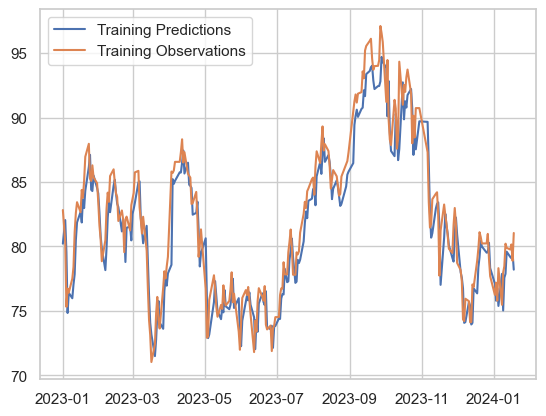

In [67]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [68]:
dates_val

array([Timestamp('2024-01-19 00:00:00'), Timestamp('2024-01-22 00:00:00'),
       Timestamp('2024-01-23 00:00:00'), Timestamp('2024-01-24 00:00:00'),
       Timestamp('2024-01-25 00:00:00'), Timestamp('2024-01-26 00:00:00'),
       Timestamp('2024-01-29 00:00:00'), Timestamp('2024-01-30 00:00:00'),
       Timestamp('2024-01-31 00:00:00'), Timestamp('2024-02-01 00:00:00'),
       Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-05 00:00:00'),
       Timestamp('2024-02-06 00:00:00'), Timestamp('2024-02-07 00:00:00'),
       Timestamp('2024-02-08 00:00:00'), Timestamp('2024-02-09 00:00:00'),
       Timestamp('2024-02-12 00:00:00'), Timestamp('2024-02-13 00:00:00'),
       Timestamp('2024-02-14 00:00:00'), Timestamp('2024-02-15 00:00:00'),
       Timestamp('2024-02-16 00:00:00'), Timestamp('2024-02-19 00:00:00'),
       Timestamp('2024-02-20 00:00:00'), Timestamp('2024-02-21 00:00:00'),
       Timestamp('2024-02-22 00:00:00'), Timestamp('2024-02-23 00:00:00'),
       Timestamp('2024-02

2/2 [==============================] - 0s 1ms/step


(array([19744., 19754., 19761., 19768., 19775., 19783.]),
 [Text(19744.0, 0, '2024-01-22'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19761.0, 0, '2024-02-08'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19775.0, 0, '2024-02-22'),
  Text(19783.0, 0, '2024-03-01')])

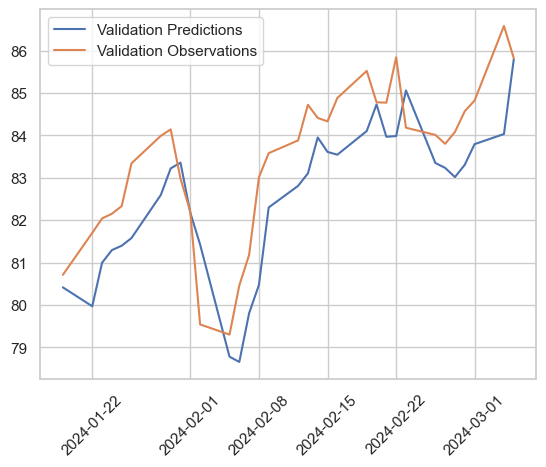

In [69]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

plt.xticks(rotation=45)

In [70]:
X_test

array([[[84.82],
        [86.58],
        [85.82]],

       [[86.58],
        [85.82],
        [86.59]],

       [[85.82],
        [86.59],
        [84.88]],

       [[86.59],
        [84.88],
        [84.29]],

       [[84.88],
        [84.29],
        [83.44]],

       [[84.29],
        [83.44],
        [83.66]],

       [[83.44],
        [83.66],
        [83.95]],

       [[83.66],
        [83.95],
        [86.16]],

       [[83.95],
        [86.16],
        [85.39]],

       [[86.16],
        [85.39],
        [86.47]],

       [[85.39],
        [86.47],
        [87.36]],

       [[86.47],
        [87.36],
        [85.77]],

       [[87.36],
        [85.77],
        [84.92]],

       [[85.77],
        [84.92],
        [84.87]],

       [[84.92],
        [84.87],
        [86.18]],

       [[84.87],
        [86.18],
        [85.91]],

       [[86.18],
        [85.91],
        [84.94]],

       [[85.91],
        [84.94],
        [86.17]],

       [[84.94],
        [86.17],
        [87.

2/2 [==============================] - 0s 1ms/step


(array([19790., 19797., 19804., 19814., 19821., 19828., 19835.]),
 [Text(19790.0, 0, '2024-03-08'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19804.0, 0, '2024-03-22'),
  Text(19814.0, 0, '2024-04-01'),
  Text(19821.0, 0, '2024-04-08'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19835.0, 0, '2024-04-22')])

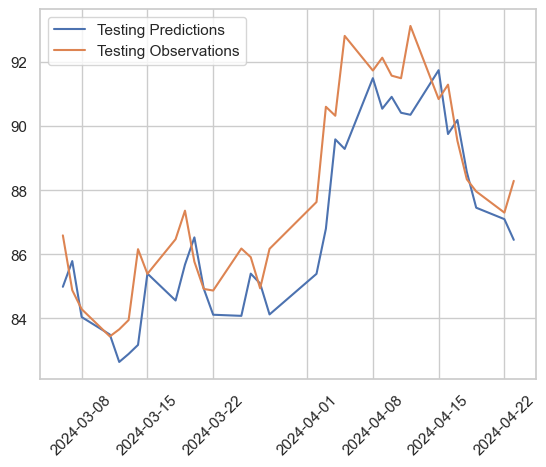

In [71]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.xticks(rotation=45)

(array([19358., 19417., 19478., 19539., 19601., 19662., 19723., 19783.,
        19844.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01'),
  Text(19783.0, 0, '2024-03'),
  Text(19844.0, 0, '2024-05')])

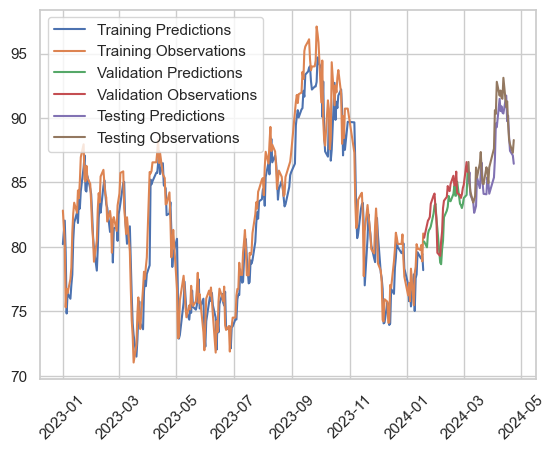

In [72]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

plt.xticks(rotation=45)

In [73]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 8ms/step


(array([19358., 19417., 19478., 19539., 19601., 19662., 19723., 19783.,
        19844.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01'),
  Text(19783.0, 0, '2024-03'),
  Text(19844.0, 0, '2024-05')])

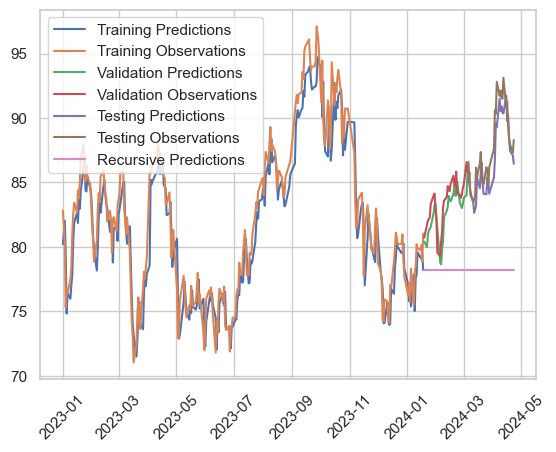

In [74]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])
plt.xticks(rotation=45)

In [75]:
# Assuming 'model' is your trained model
model.save('output/lstm_model.h5')  # Saving the model in HDF5 format

/Users/tupizz/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
oil_df_sorted_since_2023 = oil_df_sorted[oil_df_sorted.index > '2023-01-01']
oil_df_sorted_since_2023.to_csv('output/oil_prices_sorted_since_2023.csv', index=True)

In [77]:
## get last 3 items from the dataframe
oil_df_sorted.tail(3)

,Price
Date,
2024-05-01,83.55
2024-05-02,84.81
2024-05-03,83.60


In [78]:
### try to predict the next 3 days
N = 3
last_3_days = oil_df_sorted.tail(N)['Price'].to_numpy()
last_3_days = last_3_days.reshape((1, N, 1))
last_3_days

array([[[83.55],
        [84.81],
        [83.6 ]]])

In [79]:
model.predict(last_3_days).flatten()

1/1 [==============================] - 0s 8ms/step


array([82.78114], dtype=float32)

In [80]:
last_3_days_raw = np.array([[ [88.1 ],  [89.95],  [88.44] ]])
model.predict(last_3_days_raw)

1/1 [==============================] - 0s 8ms/step


array([[87.52463]], dtype=float32)